<a href="https://colab.research.google.com/github/anishdevadiga/Machine_Learning/blob/main/week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score , confusion_matrix
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from google.colab import drive

In [54]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
df=pd.read_csv('/content/drive/My Drive/datasets/daat/play_tennis.csv')
print(df)
data=pd.DataFrame(df)

    day   outlook  temp humidity    wind play
0    D1     Sunny   Hot     High    Weak   No
1    D2     Sunny   Hot     High  Strong   No
2    D3  Overcast   Hot     High    Weak  Yes
3    D4      Rain  Mild     High    Weak  Yes
4    D5      Rain  Cool   Normal    Weak  Yes
5    D6      Rain  Cool   Normal  Strong   No
6    D7  Overcast  Cool   Normal  Strong  Yes
7    D8     Sunny  Mild     High    Weak   No
8    D9     Sunny  Cool   Normal    Weak  Yes
9   D10      Rain  Mild   Normal    Weak  Yes
10  D11     Sunny  Mild   Normal  Strong  Yes
11  D12  Overcast  Mild     High  Strong  Yes
12  D13  Overcast   Hot   Normal    Weak  Yes
13  D14      Rain  Mild     High  Strong   No


In [41]:
label_encoder={}
for column in data.select_dtypes(include=['object']).columns:
  le=LabelEncoder()
  data[column]=le.fit_transform(data[column])
  label_encoder[column]=le

In [48]:
X=data.iloc[:,:-1]
y=data['play']
X


,day,outlook,temp,humidity,wind
0,0,2,1,0,1
1,6,2,1,0,0
2,7,0,1,0,1
3,8,1,2,0,1
4,9,1,0,1,1
5,10,1,0,1,0
6,11,0,0,1,0
7,12,2,2,0,1
8,13,2,0,1,1
9,1,1,2,1,1


In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [50]:
accuracy=accuracy_score(y_test,y_pred)
print("Accouracy of the Decision tree :",accuracy)


Accouracy of the Decision tree : 0.4


In [52]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[0 2]
 [1 2]]


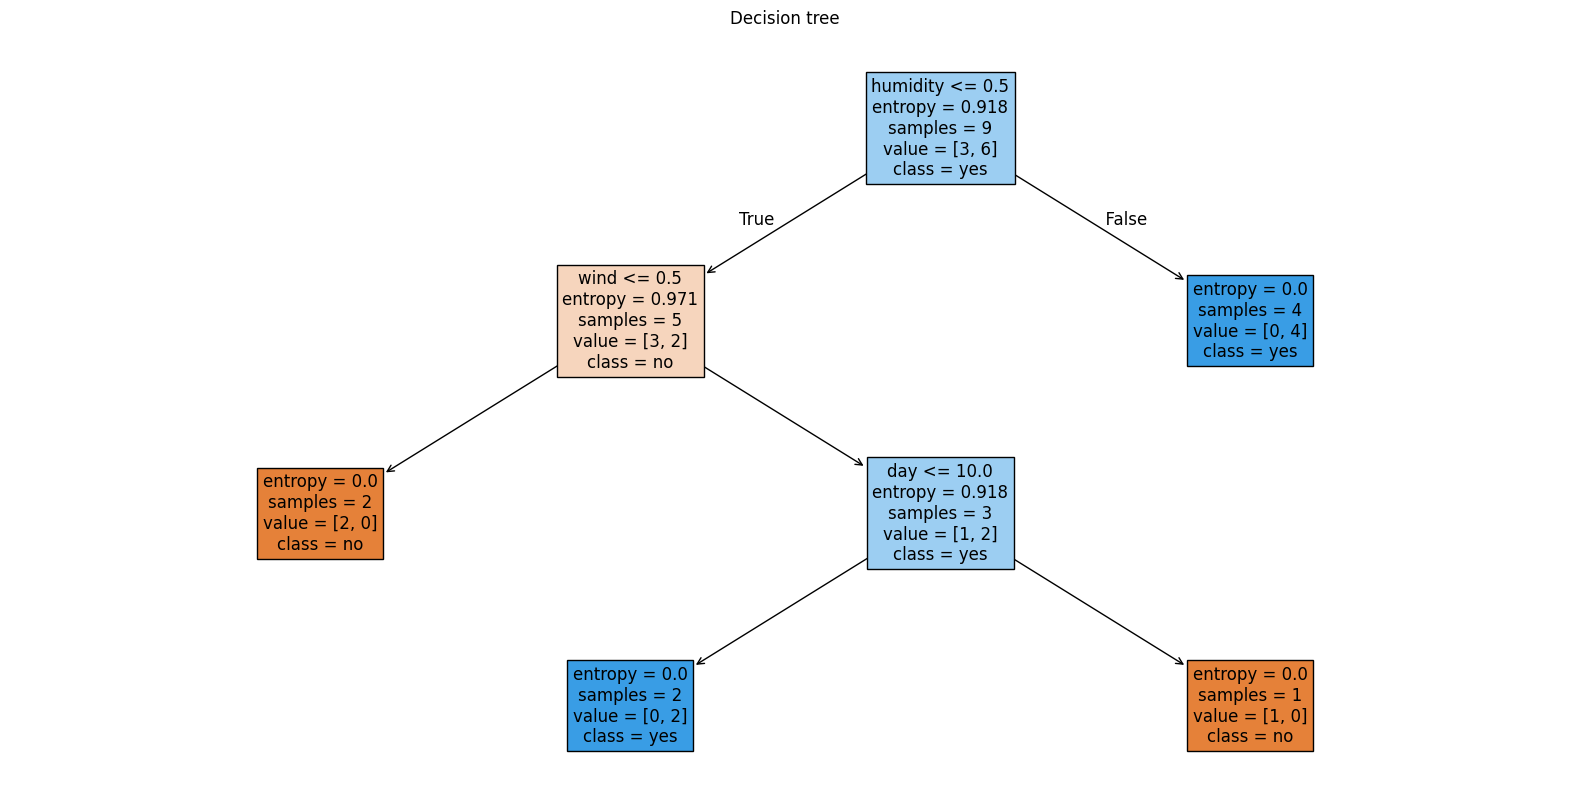

In [55]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf,filled=True,feature_names=X.columns,class_names=['no','yes'],fontsize=12)
plt.title("Decision tree")
plt.show()

